**Author:** Sai krishna Kadari

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data=pd.read_csv('india_news_headlines.csv',dtype={'publish_date':object})
data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [3]:
data.shape

(3297172, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
publish_date         object
headline_category    object
headline_text        object
dtypes: object(3)
memory usage: 37.7+ MB


In [17]:
data.publish_date.values

array(['20010101', '20010102', '20010102', ..., '20200630', '20200630',
       '20200630'], dtype=object)

In [34]:
a='20010101'
a[:4]

'2001'

In [5]:
data['publish_month']=data['publish_date'].str[:6]
data['publish_year']=data['publish_date'].str[:4]
data['publish_month_only']=data['publish_date'].str[4:6]
data['publish_day_only']=data['publish_date'].str[6:8]

data['dt_date'] = pd.to_datetime(data['publish_date'], format='%Y%m%d')
data['dt_month'] = pd.to_datetime(data['publish_month'], format='%Y%m')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 9 columns):
publish_date          object
headline_category     object
headline_text         object
publish_month         object
publish_year          object
publish_month_only    object
publish_day_only      object
dt_date               datetime64[ns]
dt_month              datetime64[ns]
dtypes: datetime64[ns](2), object(7)
memory usage: 138.4+ MB


In [7]:
data.isnull().sum()

publish_date          0
headline_category     0
headline_text         0
publish_month         0
publish_year          0
publish_month_only    0
publish_day_only      0
dt_date               0
dt_month              0
dtype: int64

In [8]:
data.describe(include='all').transpose()

,count,unique,top,freq,first,last
publish_date,3297172,7080,20181231,766,NaT,NaT
headline_category,3297172,1016,india,285619,NaT,NaT
headline_text,3297172,3082589,Sunny Leone HOT photos,98,NaT,NaT
publish_month,3297172,234,201812,21831,NaT,NaT
publish_year,3297172,20,2016,255905,NaT,NaT
publish_month_only,3297172,12,05,284517,NaT,NaT
publish_day_only,3297172,31,22,109400,NaT,NaT
dt_date,3297172,7080,2018-12-31 00:00:00,766,2001-01-01,2020-06-30
dt_month,3297172,234,2018-12-01 00:00:00,21831,2001-01-01,2020-06-01


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


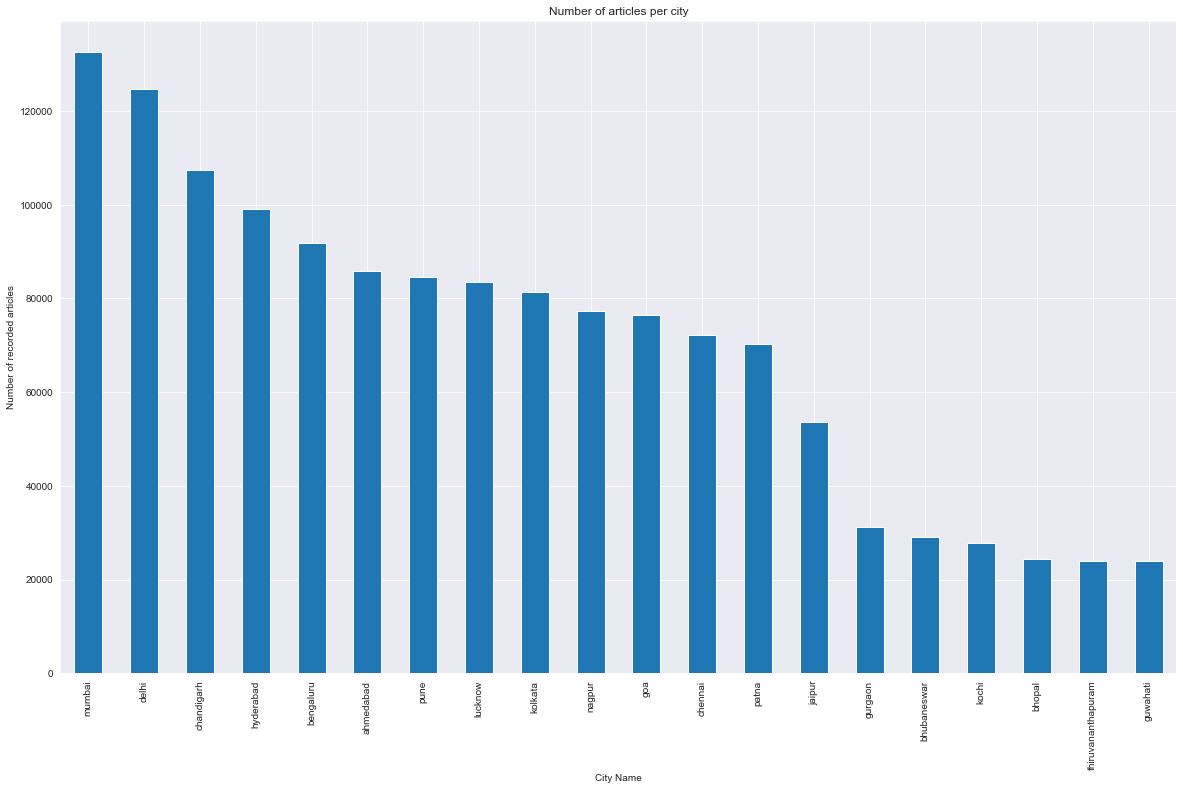

In [9]:
data_cities = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
data_cities['city_name'] = data_cities.headline_category.str[5:]
city_list = data_cities['city_name'].unique().tolist()

#Bar chart of covrage by cities in descending order
grp_city = data_cities.groupby(['city_name'])['headline_text'].count().nlargest(20)
ts = pd.Series(grp_city)
ts.plot(kind='bar', figsize=(20,12))
plt.xlabel('City Name')
plt.ylabel('Number of recorded articles')
plt.title('Number of articles per city')
plt.show()

data['publish_date'] = pd.to_datetime(data['publish_date'])
data['year'] = data['publish_date'].apply(lambda x: (x.microsecond)//10)
data = data.drop('publish_date', axis = 1)
data = data.reset_index(drop=True)
data_cities = data_cities.reset_index(drop=True)
data_cities['year'] = data['year']
data_cities = data_cities.drop('headline_category', axis = 1)

data_cities2 = data_cities
data_cities2['headline_text'] = 1
fig, ax = plt.subplots(figsize=(20,10))
grp = data_cities2.groupby(['year', 'city_name']).sum()['headline_text'].unstack().plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of articles')
plt.title('Year-wise coverage for cities')
plt.show()

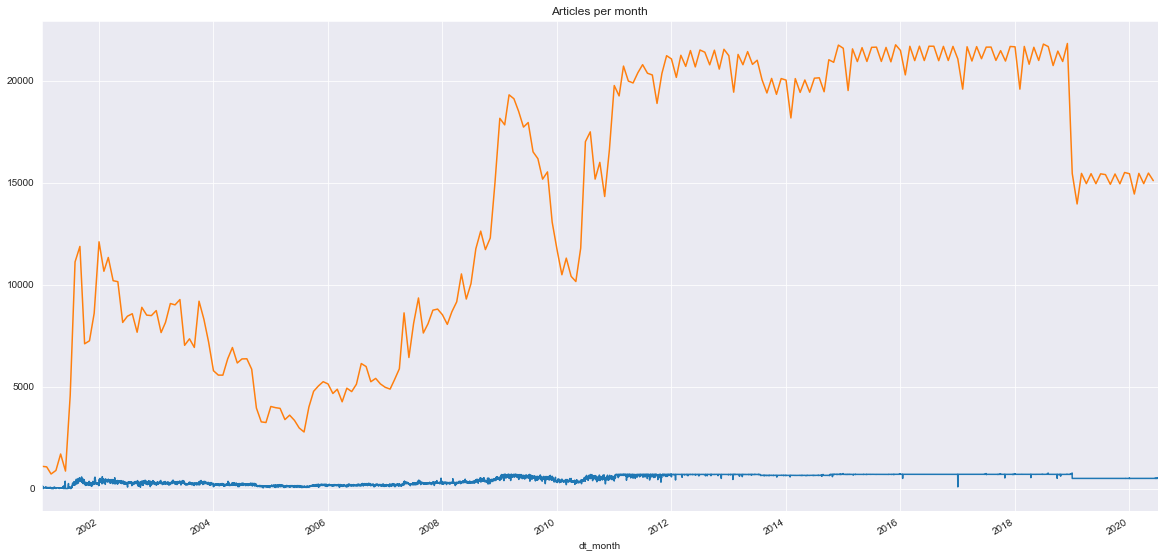

In [10]:
# Monthly and daily plot

grp_date=data.groupby(['dt_date'])['headline_text'].count()
grp_month=data.groupby(['dt_month'])['headline_text'].count()

ts=pd.Series(grp_date)
ts.plot(kind='line',figsize=(20,10),title='Articles per day')

ts=pd.Series(grp_month)
ts.plot(kind='line',figsize=(20,10),title='Articles per month')
plt.show()

In [11]:
years=data['publish_year'].unique().tolist()
print(years)

['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


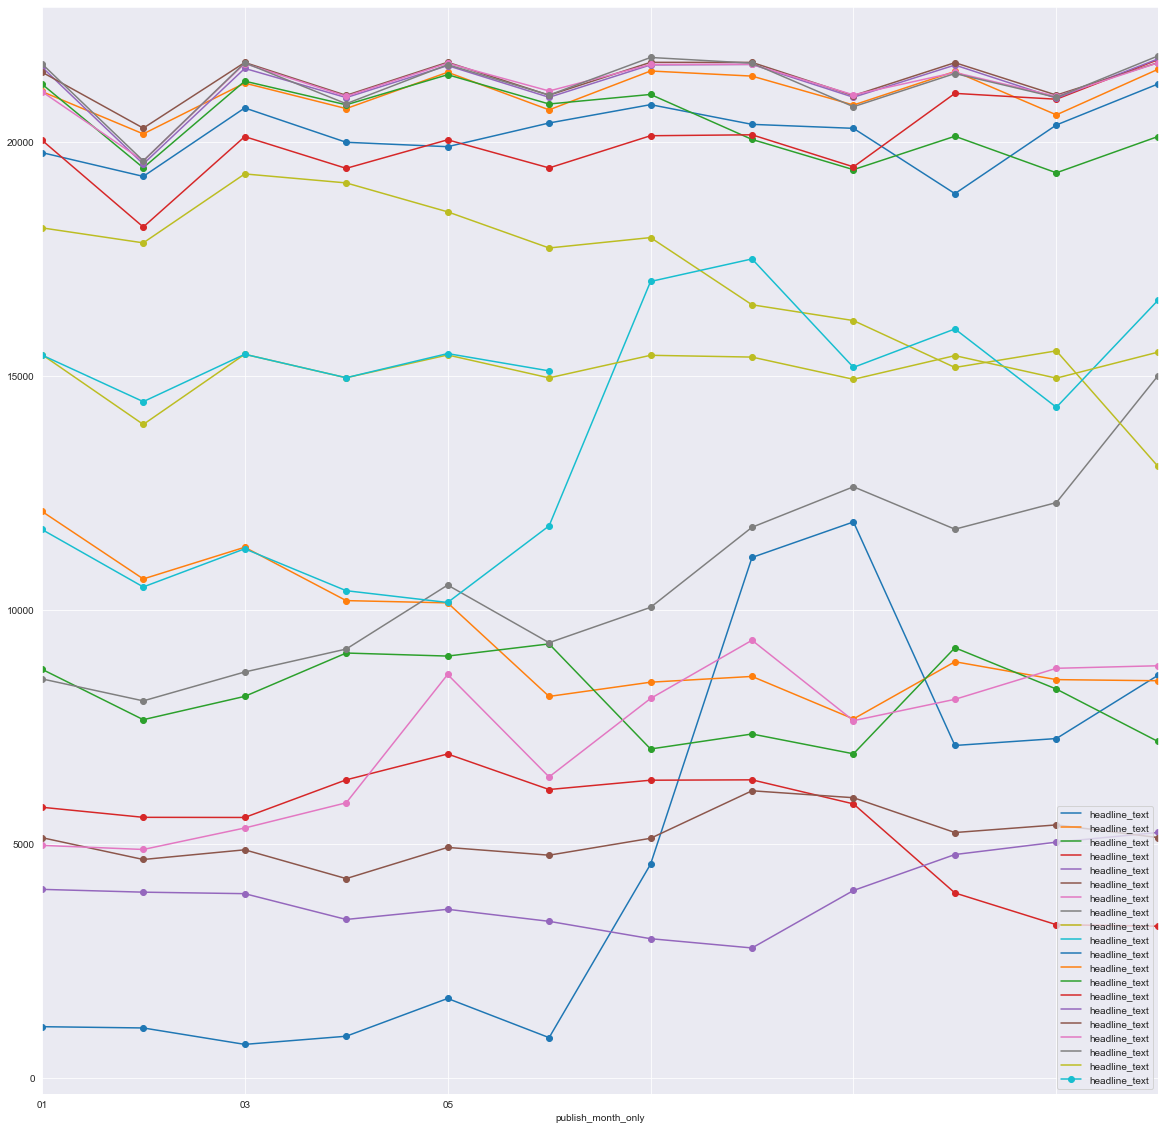

In [12]:
for year in years:
    yr_slice=data.loc[data.publish_year==year]
    grp_month=yr_slice.groupby(['publish_month_only'])['headline_text'].count()
    month_ts=pd.Series(grp_month)
    month_ts.plot(kind='line',figsize=(20,20),style='o-',legend=True)
plt.show()

In [13]:
data_city=data[data['headline_category'].str.contains('^city\.[a-z]+$',regex=True)]
data_city['city_name']=data_city.headline_category.str[5:]

city_list=data_city['city_name'].unique().tolist()
print(city_list)

['bengaluru', 'patna', 'delhi', 'ahmedabad', 'thiruvananthapuram', 'pune', 'mumbai', 'chandigarh', 'lucknow', 'kolkata', 'hyderabad', 'chennai', 'bareilly', 'aurangabad', 'nagpur', 'bhopal', 'vadodara', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru', 'mysuru', 'rajkot', 'surat', 'kanpur', 'varanasi', 'allahabad', 'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'gurgaon', 'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode', 'nashik', 'raipur', 'visakhapatnam', 'kolhapur', 'navimumbai', 'trichy', 'puducherry', 'dehradun', 'meerut', 'agra', 'vijayawada', 'jamshedpur', 'imphal', 'shillong', 'amritsar', 'shimla', 'cuttack', 'jind', 'agartala', 'jammu', 'faridabad', 'srinagar', 'salem', 'rajahmundry', 'erode', 'ghaziabad', 'itanagar', 'ajmer', 'kohima', 'gaya', 'jodhpur', 'udaipur', 'amaravati']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


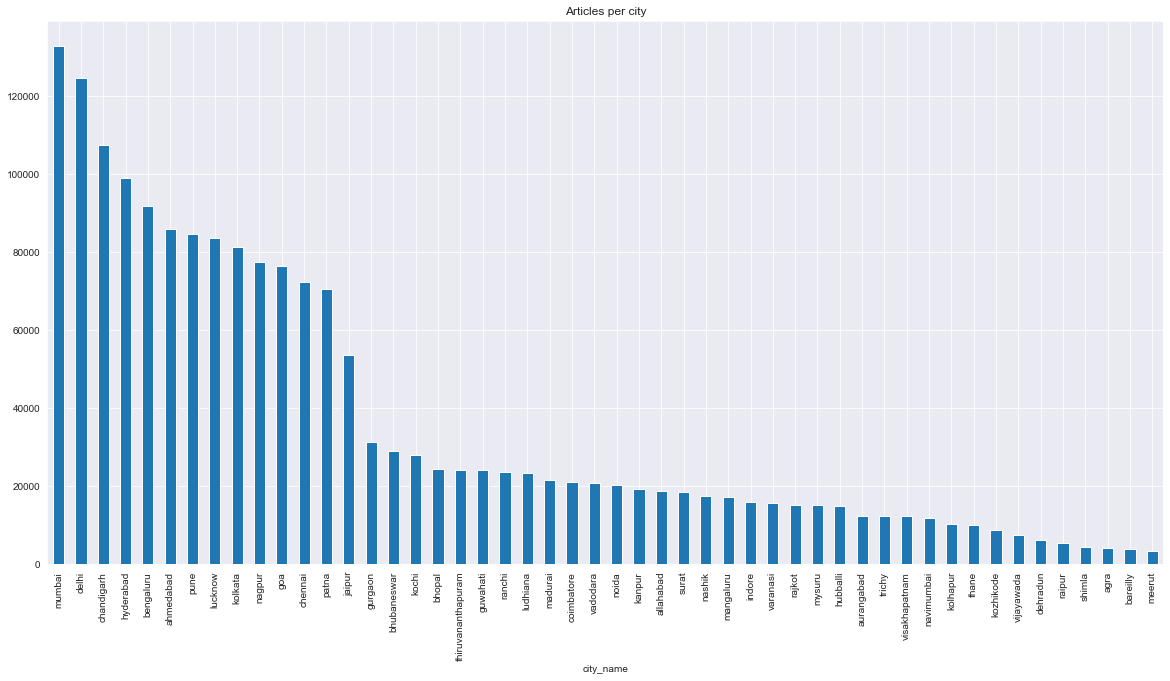

In [14]:
#bar plot for all cities

grp_city=data_city.groupby(['city_name'])['headline_text'].count().nlargest(50)
ts=pd.Series(grp_city)
ts.plot(kind='bar',figsize=(20,10),title='Articles per city')
plt.show()

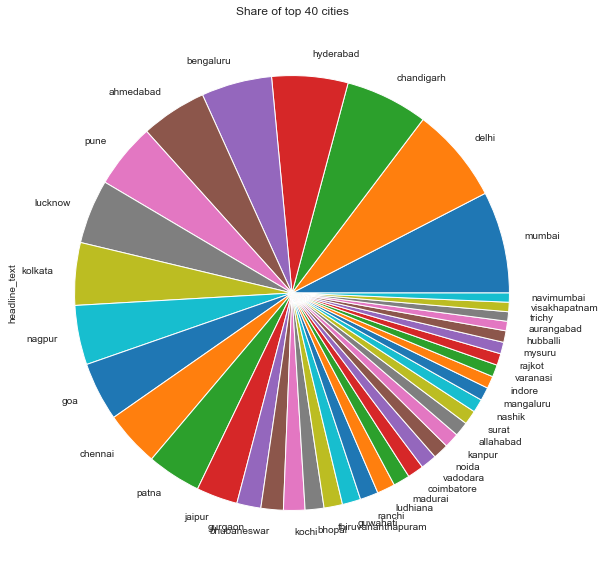

In [15]:
grp_top_city=data_city.groupby(['city_name'])['headline_text'].count().nlargest(40)
ts=pd.Series(grp_top_city)
ts.plot(kind='pie',figsize=(10,10),title='Share of top 40 cities')
plt.show()

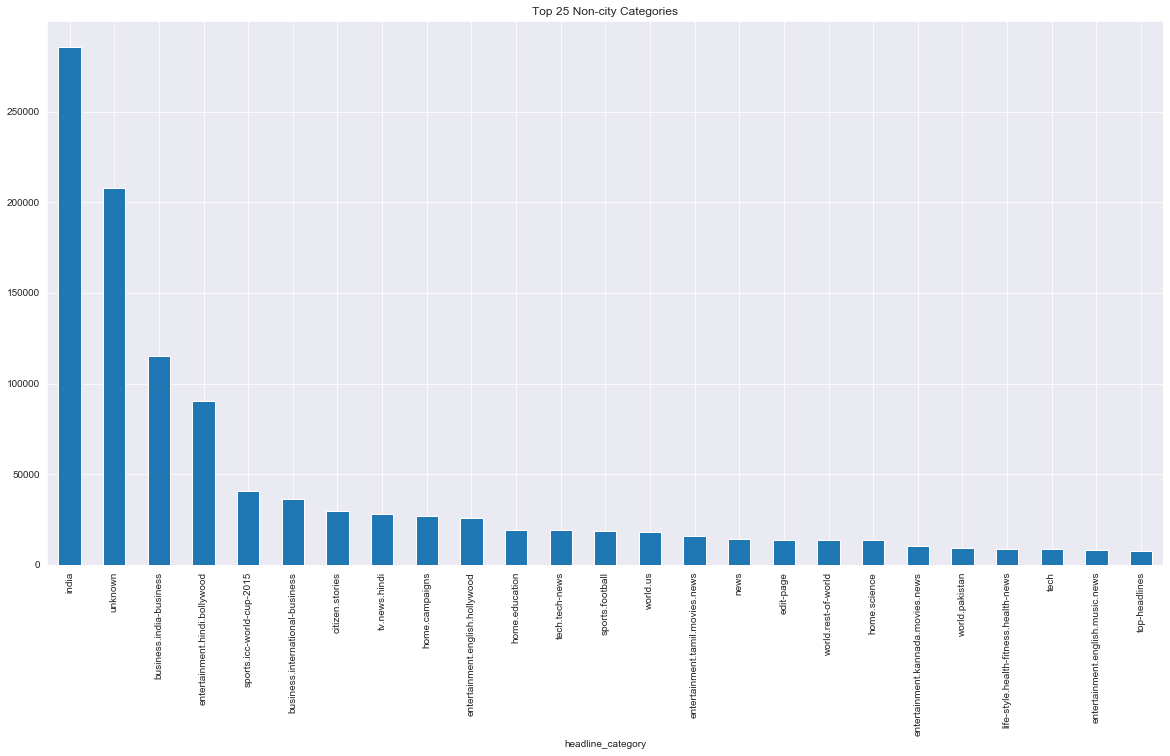

In [16]:
data_non_city=data[~data['headline_category'].str.contains('city',regex=False)]

grp_non_city=data_non_city.groupby(['headline_category'])['headline_text'].count().nlargest(25)
ts=pd.Series(grp_non_city)
ts.plot(kind='bar',figsize=(20,10),title='Top 25 Non-city Categories')
plt.show()